In [1]:
%load_ext autoreload
%autoreload 2

## Step 1. Generate a configuration file

In [2]:
import vtspy
from vtspy import *

In [3]:
ls ./veritas

95127.anasum.fits  95128.anasum.root  95130.anasum.log   output.pickle
95127.anasum.log   95129.anasum.fits  95130.anasum.root  simple.pickle
95127.anasum.root  95129.anasum.log   hdu-index.fits.gz
95128.anasum.fits  95129.anasum.root  initial.pickle
95128.anasum.log   95130.anasum.fits  obs-index.fits.gz


In [4]:
config = GammaConfig(files="./veritas/")
# or FermipyConfig(files="./veritas/95127.anasum.fits")

2022-06-09 14:27:43 INFO    : a configuration file (config.yaml) is created.


In [5]:
config.print_config()

2022-06-09 14:27:43 INFO    : 
data:
  evfile: ./fermi/EV00.lst
  scfile: ./fermi/SC00.fits
  ltcube: null
binning:
  roiwidth: 12
  binsz: 0.08
  binsperdec: 8
  coordsys: CEL
  projtype: WCS
selection:
  emin: 100
  emax: 300000
  tmin: 599529605.0
  tmax: 599616005.0
  zmax: 105
  evclass: 128
  evtype: 3
  glon: 186.3593855387067
  glat: 82.73442268671826
  ra: 185.3412470056114
  dec: 30.17694222440679
  target: 1ES1218+304
gtlike:
  edisp: true
  irfs: P8R3_SOURCE_V3
  edisp_disable:
  - isodiff
  - galdiff
model:
  src_roiwidth: 12
  galdiff: $FERMI_DIFFUSE_DIR/gll_iem_v07.fits
  isodiff: $FERMI_DIFFUSE_DIR/iso_P8R3_SOURCE_V3_v1.txt
  catalogs: /Users/dtak/Research/scripts/vts-fermi/vtspy/refdata/gll_psc_v22.fit
fileio:
  outdir: ./fermi/
  logfile: ./log/fermipy.log
  usescratch: false
vts_setup:
  tmin: 58849.46887128472
  tmax: 58849.552106979165
  format: mjd
  max_region_number: 6
  radius: 2.0
  th2cut: 0.008
  exc_on_region_radius: 0.7
  exc_radius: 0.25
  emin: 0.1
  ema

## Step 2. Analyze the VERITAS data

In [6]:
from vtspy.analysis import VeritasAnalysis







/Users/dtak/Software/miniconda3/envs/fermipy/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
veritas = VeritasAnalysis(overwrite=True)

2022-06-09 14:27:45 INFO    : Initialize the VERITAS analysis.
2022-06-09 14:27:45 INFO    : Load the data files.
2022-06-09 14:27:45 INFO    : Observations selected: 4 out of 4.
2022-06-09 14:27:45 INFO    : The number of observations is {len(self._observations)}
2022-06-09 14:27:45 INFO    : Define exclusion regions.
2022-06-09 14:27:45 INFO    : Define ON- and OFF-regions.
2022-06-09 14:27:46 INFO    : The initial setup is saved [state_file = initial].
2022-06-09 14:27:46 INFO    : Completed (VERITAS initialization).


### Plot ON- and OFF- regions

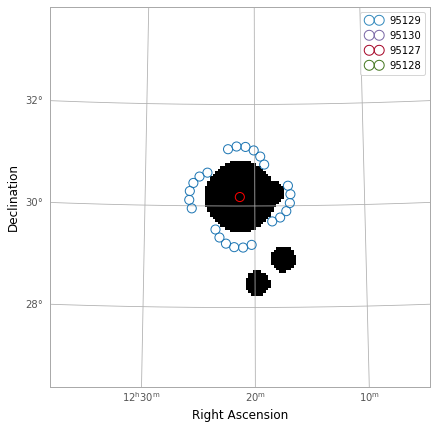

In [8]:
from vtspy.plotting import plot_ROI
plot_ROI(veritas=veritas)

### Peek dataset

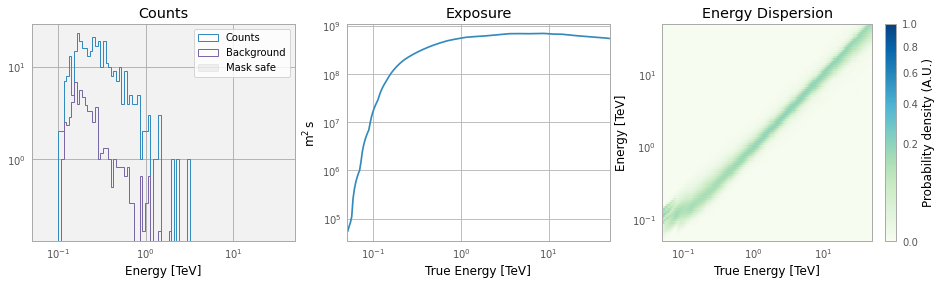

In [9]:
veritas.peek_dataset()

### Apply additional cuts

In [10]:
veritas.create_dataset(eff_cut=0.2, bias_cut=0.2)

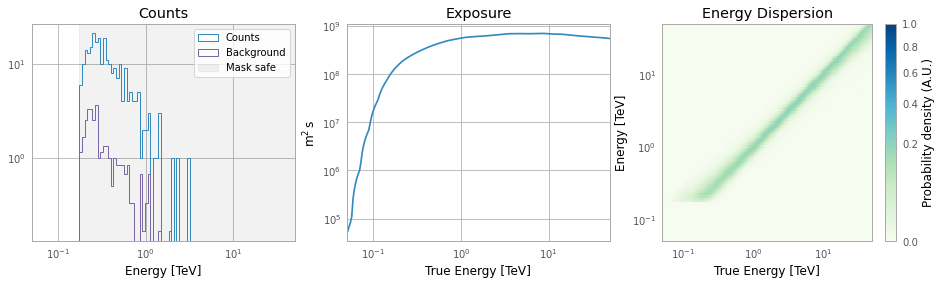

In [11]:
veritas.peek_dataset()

### Perform fit and do high-level analyses

2022-06-09 14:27:53 INFO    : Fit successfully.


36.50521827709935


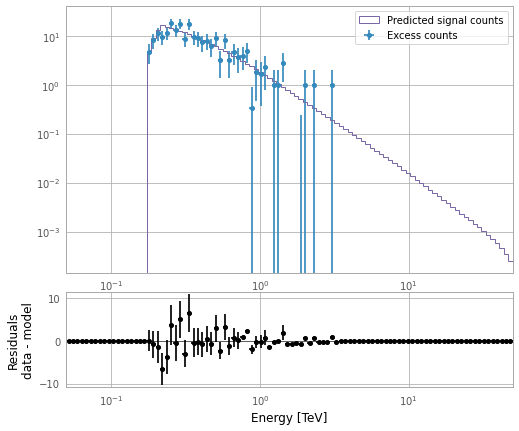

In [12]:
veritas.simple_fit(model="PowerLaw")
veritas.plotting("fit")
print(veritas.fit_results.total_stat)

2022-06-09 14:27:55 INFO    : Fit successfully.


33.625136604428874


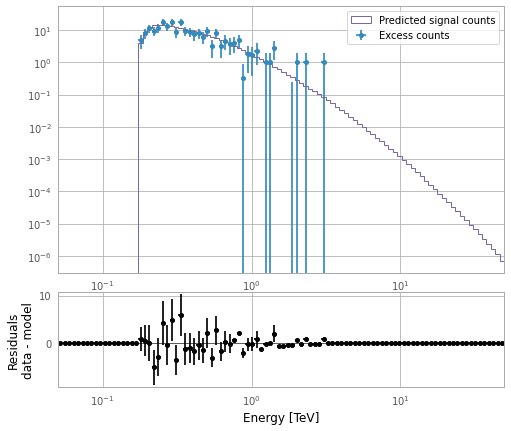

In [13]:
veritas.simple_fit(model="LogParabola")
veritas.plotting("fit")
print(veritas.fit_results.total_stat)

In [14]:
veritas.simple_analysis()

2022-06-09 14:27:56 INFO    : Generating flux points and SED...
2022-06-09 14:28:05 INFO    : Generating flux points and SED is completed.


### Plot the results

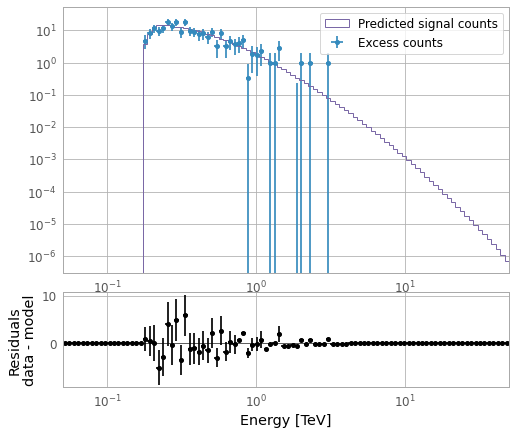

In [15]:
veritas.plotting("fit")

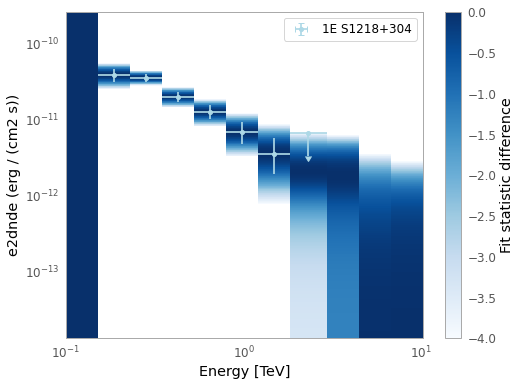

In [16]:
veritas.plotting("flux")

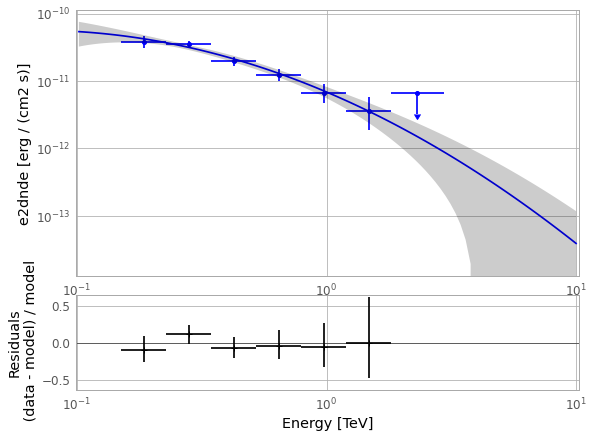

In [17]:
veritas.plotting("sed")

In [18]:
veritas.print_flux()

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.123,0.100,0.151,nan,nan,nan,nan,nan,nan,nan,nan,0.0,0.000,False,0.0,False,0.200 .. 5.000,nan .. nan
0.186,0.151,0.229,2.370e-11,4.623e-12,4.848e-12,4.405e-12,3.386e-11,51.762,7.195,42.88179429074375,34.19543,1.528,False,43.0,True,0.200 .. 5.000,27.566 .. 180.566
0.281,0.229,0.346,2.179e-11,2.498e-12,2.579e-12,2.418e-12,2.712e-11,177.959,13.340,101.38747067697466,88.452095,5.630,False,101.0,True,0.200 .. 5.000,103.978 .. 341.262
0.426,0.346,0.524,1.226e-11,1.857e-12,1.939e-12,1.777e-12,1.630e-11,107.533,10.370,54.888143727627906,49.36956,1.180,False,55.0,True,0.200 .. 5.000,52.163 .. 259.227
0.644,0.524,0.792,7.751e-12,1.573e-12,1.670e-12,1.483e-12,1.130e-11,62.178,7.885,30.126318153895618,27.15283,3.334,False,30.0,True,0.200 .. 5.000,33.600 .. 137.190
0.975,0.792,1.199,4.179e-12,1.328e-12,1.455e-12,1.206e-12,7.353e-12,24.007,4.900,13.123223408538529,11.310432,6.049,False,13.0,True,0.200 .. 5.000,18.734 .. 63.217
1.476,1.199,1.815,2.200e-12,1.193e-12,1.365e-12,1.029e-12,5.300e-12,9.363,3.060,4.491883215398336,4.240547,5.906,False,5.0,True,0.200 .. 5.000,10.187 .. 25.065
2.312,1.815,2.944,1.298e-12,9.180e-13,1.146e-12,7.257e-13,4.085e-12,3.269,1.808,2.1426742126625546,1.9998171,4.823,True,2.0,True,0.200 .. 5.000,7.342 .. 10.031


### Generate light curve

In [19]:
veritas.simple_analysis(jobs="lc", nbins=2)

2022-06-09 14:28:09 INFO    : Generating lightcurve...
2022-06-09 14:28:09 INFO    : The number of time intervals is 2
2022-06-09 14:28:12 INFO    : Generating lightcurve is completed.


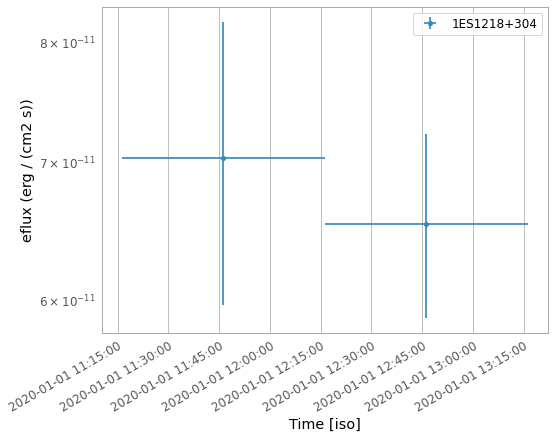

In [20]:
veritas.plotting("lc")

In [21]:
veritas.print_lightcurve()

time_min,time_max,e_ref,e_min,e_max,eflux,eflux_err,eflux_errp,eflux_errn,eflux_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
,,TeV,TeV,TeV,TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),TeV / (cm2 s),,,,,,,,,,
float64,float64,float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],float64[1],"float64[1,4]","float64[1,4]",float64[1],bool[1],"float64[1,4]",bool[1],"float64[1,11]","float64[1,11]"
58849.46967202546,58849.51128987268,0.44052443650400697,0.09976311574844397,1.9452257249714022,4.3868843804094703e-11,6.928781345889074e-12,7.234595154371248e-12,6.629906305156583e-12,5.896296698370047e-11,97.21346625254873,9.859688953133801,nan .. nan,nan .. nan,20.294123859761548,False,nan .. nan,True,0.2 .. 4.999999999999999,69.45998440300578 .. 237.0920630220271
58849.51128987268,58849.5529077199,0.44052443650400697,0.09976311574844397,1.9452257249714022,4.075336710104071e-11,4.18247364977331e-12,4.30846670168525e-12,4.0585831915060705e-12,4.962649372714512e-11,214.74541871648896,14.654194577542942,58.694365827572646 .. nan,52.214420318603516 .. nan,76.08315323061916,False,60.0 .. nan,True,0.2 .. 4.999999999999999,182.48398532044018 .. 636.7492848707338
